<img src="https://www.promocionachile.cl/img/logos/uai.JPG" width="400" alt="utfsm-logo" align="left"/>

# LEC de Probabilidad y Estadística, Viña del mar.
## Sesión 06
### Profesores: Gustavo Arcaya - Eduardo Rubio

# Objetivos:
* Presentar distribuciones continuas especiales
    * Distribución Chi-Cuadrado
    * Distribución t-Student
    
* Realizar estimación de parámetros

* Calcular intervalos de confianza
--------------
--------------


## Distribuciones que provienen de una variable aleatoria que distribuye normal
* **Distribución Chi-Cuadrado**

Sean $X_i\sim N(0,1)$, con $i=1,...,n$ independientes. Definamos:
$$
Y = \sum_{i=1}^n X_i ^2
$$
Entonces diremos que $Y$ sigue una distribución chi-cuadrado con $n$ grados de libertad y lo anotaremos como $Y \sim \chi^2(n)$.

####  Relación con la Gamma
La distribución $\chi^2$ es un caso especial de la distribución gamma. De hecho se tiene que:
$$
\chi^2(n) =^d = \Gamma \left( \dfrac{n}{2},\dfrac{1}{2} \right)
$$
-------------

### Aplicaciones
**Importante:** Suponga que $X_i$ es una muestra aleatoria de tamaño $n$ que viene desde una distribución normal de parámetros $\mu$ y $\sigma^2$. Entonces se tiene que:
$$
\bar{X} = \dfrac{1}{n}\sum_{i=1}^n X_i \sim N\left(\mu,\dfrac{\sigma^2}{n}\right)
$$
$$
\dfrac{(n-1)S^2}{\sigma^2} = \sum_{i=1}^n \left(\dfrac{X_i - \bar{X}}{\sigma}\right)^2 \sim \chi^2 (n-1)
$$

### Simulaciones, probabilidades y cuantilies
Al igual como vimos en las clases anteriores podemos simular datos que vienen desde esta distribución, al igual que calcular cuantilies y probabilidades

In [1]:
grados_de_libertad = 9

In [2]:
set.seed(0)
chi2=rchisq(10000,grados_de_libertad)

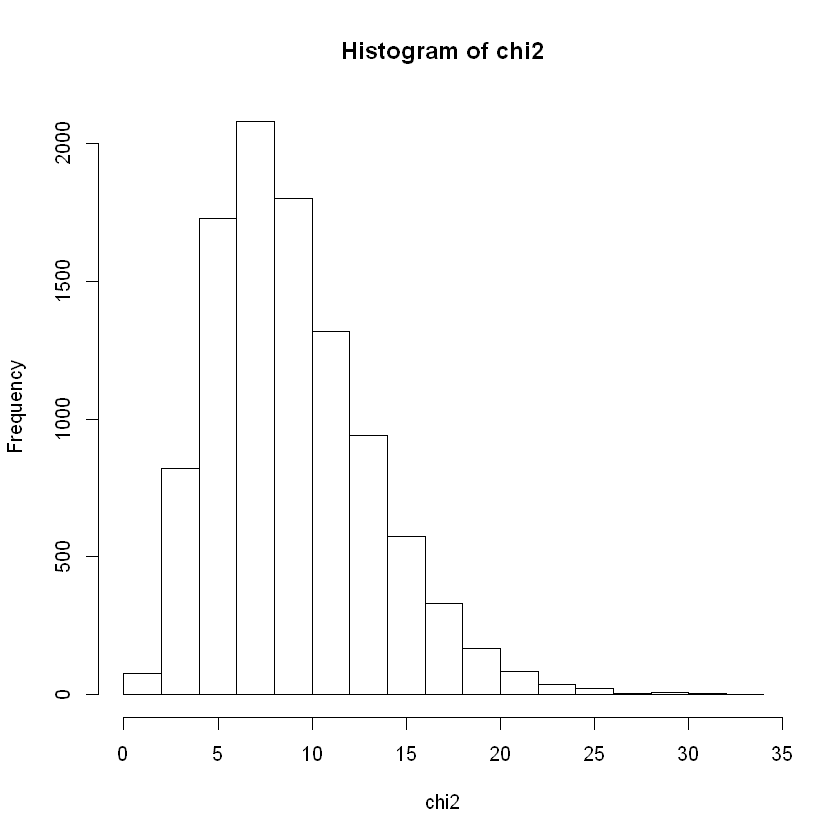

In [3]:
hist(chi2)

Como antes, podemos usar los comandos `pchisq` y  `qchisq` para entontrar la probabilidad acumulada hasta un valor $x_0$ de la variable aleatoria y para encontrar el valor de $\hat{x}$ para el cual se alcanza cierto valor de probabilidad acumulada $\hat{P}$

In [4]:
pchisq(10,grados_de_libertad)        #<----- pchisq(x_0, grados de libertad) = probabilidad acumulada hasta x_0

[1] 0.6495148

In [5]:
qchisq(0.65,grados_de_libertad)      #<----- qchisq(P, grados de libertad) = valor en que la variable aleatoria alcanza una probabilidad acumulada P

[1] 10.006

----------------

### Distribución t-Student
La distribución t de Student es la distribución de probabilidad del cociente
$$
    {\displaystyle T={\frac {Z}{\sqrt {V/k }}}=Z{\sqrt {\frac {k }{V}}}} 
$$
donde:
*    Z es una variable aleatoria distribuida según una normal estándar(de media 0 y varianza 1).
*    V es una variable continua que sigue una distribución $\chi^2$ con ${k  }$ grados de libertad.
*    Z y V son independientes
Y anotaremos que $T \sim t(k)$.
---------------

### Aplicaciones
Sea $X_1,...,X_n$ una muestra aleatoria de tamaño $n$ desde una normal de parámetros $\mu$ y $\sigma^2$. Entonces se tiene que:
$$
 \dfrac{\bar{X} - \mu}{\frac{S}{\sqrt{n}}} \sim t(n-1)
$$
**NOTA** La distribución $t$ es simetrica con respecto al 0.

### Simulaciones, probabilidades y cuantiles
Nota que para simular la distribución t y calcular probabilidades se debe hacer lo siguiente:

In [6]:
grados_de_libertad2 = 15

In [7]:
set.seed(96)
data=rt(2000,grados_de_libertad2)

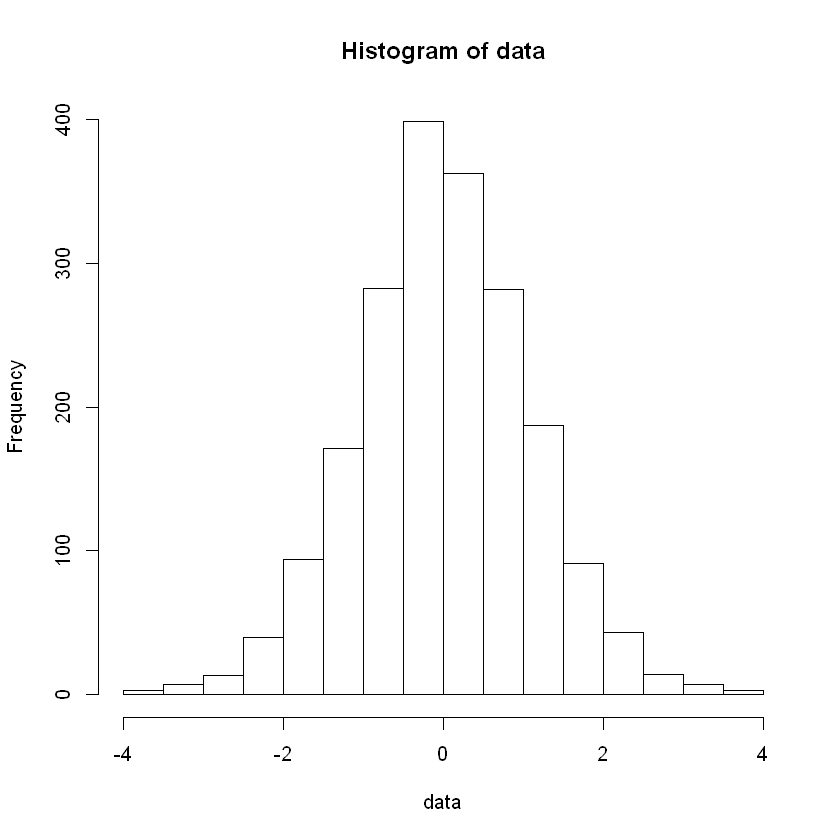

In [8]:
hist(data)

Como antes, podemos usar los comandos `pt` y  `qt` para entontrar la probabilidad acumulada hasta un valor $x_0$ de la variable aleatoria y para encontrar el valor de $\hat{x}$ para el cual se alcanza cierto valor de probabilidad acumulada $\hat{P}$

In [9]:
pt(-1,grados_de_libertad2)         #<----- pt(x_0, grados de libertad) = probabilidad acumulada hasta x_0

[1] 0.1665851

In [10]:
qt(0.16,grados_de_libertad2)       #<----- qt(P, grados de libertad) = valor en que la variable aleatoria alcanza una probabilidad acumulada P

[1] -1.028533

--------------
-------------

## Estimación de parámetros de una distribución normal
Suponga que $X\sim N(\mu,\sigma^2)$ entonces nos gustaría estimar el valor de $\mu$ (que llamamos media poblacional). Para ello utilizaremos una aproximación de $\mu$ dada por la media muestral $\bar{X}$ de $n$ datos y anotaremos la estimación $\hat{\mu}$ dada por este promedio


\begin{equation}
\hat{\mu} = \bar{X} = \dfrac{1}{n}\sum X_i
\end{equation}

Además tenemos que:

\begin{equation}
\hat{\mu} \sim N\left( \mu , \dfrac{\sigma^2}{n} \right)
\end{equation}

Por otro lado también buscaremos estimar $\sigma^2$. Para ello aproximaremos $\sigma^2$ mediante la varianza muestral $S^2$ con $n$ datos y anotaremos:

\begin{equation}
\hat{\sigma^2} = S^2 = \dfrac{1}{n}\sum (X_i - \overline{X})^2
\end{equation}

Además se cumple que:

\begin{equation}
(n-1)\dfrac{S^2}{\sigma^2} \sim \chi^2 (n-1)
\end{equation}

y

\begin{equation}
\dfrac{ \bar{X} - \mu }{ \frac{S}{\sqrt{n}}} \sim t(n-1)
\end{equation}

_De aquí nota que tanto $\bar{X}$ y $S^2$ son variables aleatorias, por tanto es razonable hablar del concepto de probabilidad._

## Intervalos de confianza para $\mu$ y $\sigma ^2$

#### Para esto, consideremos la siguiente base de datos, con las siguientes especificaciones
   * Climbers table: climber_df.csv
   * date_first -> date of the first ascension
   * date_last -> date of the last ascension
   * grades_first -> grade of the first ascension
   * grades_last -> grade of the last ascension
   * years_cl -> years climbing
   * grades_count -> number of routes done by climber
   * year_first -> year of the first ascension
   * year_last -> year of the last ascension

In [11]:
data=read.csv('climber_df.csv')

In [12]:
head(data)

user_id,country,sex,height,weight,age,years_cl,date_first,date_last,grades_count,grades_first,grades_last,grades_max,grades_mean,year_first,year_last
1,SWE,0,177,73,41,21,1999-02-06 23:00:00,2001-07-31 22:00:00,84,36,55,62,46.75000,1999,2001
3,SWE,0,180,78,44,22,1999-03-31 22:00:00,2000-07-19 22:00:00,12,53,51,59,52.83333,1999,2000
4,SWE,1,165,58,33,16,2004-06-30 22:00:00,2009-05-26 22:00:00,119,53,49,64,53.89076,2004,2009
10,SWE,0,167,63,52,25,2000-01-14 23:00:00,2017-06-01 22:00:00,298,53,49,63,49.40604,2000,2017
16,NOR,0,177,68,44,21,1998-02-27 23:00:00,2010-05-13 22:00:00,5,53,49,53,51.40000,1998,2010
17,SWE,0,193,78,42,17,2001-06-19 22:00:00,2002-04-30 22:00:00,4,36,36,36,34.50000,2001,2002


Me gustaría saber si es razonable pensar que la variable `peso` sigue una ley normal de parametros $\mu$ y $\sigma^2$ por estimar. Para ello notemos que:

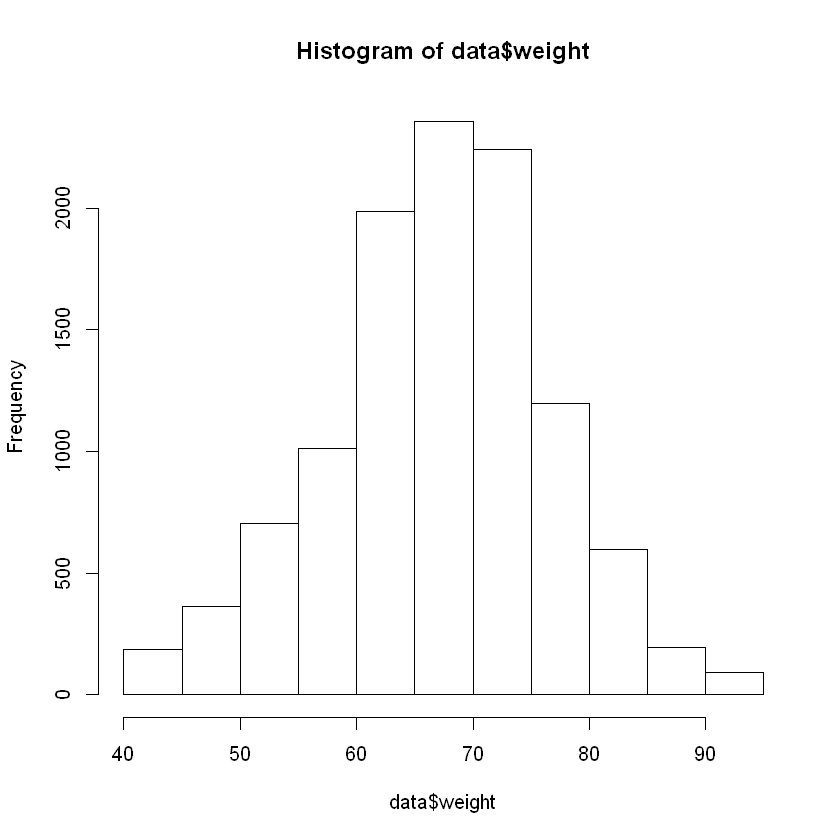

In [13]:
hist(data$weight)

Esto nos muestra que es bastante razonable pensar que los datos siguen una ley normal, puesto que es casi simetrica, pero no sabria decidir si es normal o t de student por tanto verificare la curtosis y el coeficiente de asimetria.

In [14]:
library(moments)

In [15]:
kurtosis(data$weight)

[1] 3.118432

In [16]:
skewness(data$weight)

[1] -0.218616

Por tanto es razonable pensar que los datos son normales. Buscaremos estimar los parámetros $\mu$ y $\sigma^2$, para lo que usaremos los estimadores propuestos en esta sesión 

In [17]:
barX = mean(data$weight)
S2 = var(data$weight)

In [18]:
barX
S2

[1] 67.60868

[1] 93.65044

Con eso obtenemos una estimación para la media y la varianza. Ahora nos lo que haremos sera construir un intervalo de confianza para la media y para la varianza.

**Formulario:**

Cuando $\mu$ es desconocido pero $\sigma^2$ es conocido se tiene que:
$$
IC_{\mu}: \bar{X} \pm \left|Z\left( \dfrac{1-\gamma}{2}\right)\right| \dfrac{\sigma}{\sqrt{n}}
$$
Cuando tanto $\mu$ como $\sigma^2$ son desconocidos se tiene que:
$$
IC_{\mu}: \bar{X} \pm \left|t\left( \dfrac{1-\gamma}{2} ; n-1 \right)\right| \dfrac{S}{\sqrt{n}}
$$
y
$$
IC_{\sigma^2}: \left[\frac{(n-1) s^{2}}{\chi^{2}\left(\frac{1-\gamma}{2}+\gamma \right)} ; \frac{(n-1) s^{2}}{\chi^{2}\left(\frac{1-\gamma}{2}\right)}\right]
$$

Donde $\gamma$ es el nivel de confianza. 

### IC para $\mu$ con $\sigma^2$ desconocido con la base de datos.
Procedemos a encontrar un IC para $\mu$ y $\sigma$ con una confianza $\gamma$.

In [19]:
# defino
n = length(data$weight)
gamma = 0.95 #nivel de confianza

In [20]:
LI = barX - abs(qnorm((1-gamma)/2,0,1))*sqrt(S2/n)
LI

[1] 67.42723

In [21]:
LS = barX + abs(qnorm((1-gamma)/2,0,1))*sqrt(S2/n)
LS

[1] 67.79012

In [22]:
paste('El intervalo de confianza viene dado por [',LI,';',LS,']')

[1] "El intervalo de confianza viene dado por [ 67.4272276140396 ; 67.7901239005573 ]"

Existe una función en R realiza el intervalo de confianza para la media cuando la varianza es desconocida, esta se denomina como prueba t-Student

In [23]:
#help(t.test)

In [24]:
t.test(data$weight,conf.level = 0.95)


	One Sample t-test

data:  data$weight
t = 730.29, df = 10926, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 67.42721 67.79014
sample estimates:
mean of x 
 67.60868 


-----------
-----------

### IC para $\sigma^2$ con la base de datos.
* Como el estimador de $\sigma^2$ dado por $S^2$ distribuye $\chi^2$ podemos realizar los siguientes cálculos

In [25]:
gamma=0.95

In [26]:
data = c(50 , 45 , 27 , 66 , 43 , 96 , 45 , 90 , 69)

In [27]:
S2=var(data)

In [28]:
n=length(data)

In [29]:
LI = sqrt((n-1)*S2 / qchisq( (1-gamma)/2 + gamma,n-1))
LS =  sqrt((n-1)*S2 / qchisq( (1-gamma)/2,n-1))

In [30]:
paste('[',LI,';',LS,']')

[1] "[ 15.5355117912276 ; 44.0627303076835 ]"

##### OBS: No existe una función en R que te entrega directamente este IC